In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/glassdoor_reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838566 entries, 0 to 838565
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 838566 non-null  object 
 1   date_review          838566 non-null  object 
 2   job_title            838566 non-null  object 
 3   current              838566 non-null  object 
 4   location             541223 non-null  object 
 5   overall_rating       838566 non-null  int64  
 6   work_life_balance    688672 non-null  float64
 7   culture_values       647193 non-null  float64
 8   diversity_inclusion  136066 non-null  float64
 9   career_opp           691065 non-null  float64
 10  comp_benefits        688484 non-null  float64
 11  senior_mgmt          682690 non-null  float64
 12  recommend            838566 non-null  object 
 13  ceo_approv           838566 non-null  object 
 14  outlook              838566 non-null  object 
 15  headline         

In [5]:
# df.isna().sum()
df = df.dropna()
df.count()

firm                   108544
date_review            108544
job_title              108544
current                108544
location               108544
overall_rating         108544
work_life_balance      108544
culture_values         108544
diversity_inclusion    108544
career_opp             108544
comp_benefits          108544
senior_mgmt            108544
recommend              108544
ceo_approv             108544
outlook                108544
headline               108544
pros                   108544
cons                   108544
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 108544 entries, 50 to 838565
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 108544 non-null  object 
 1   date_review          108544 non-null  object 
 2   job_title            108544 non-null  object 
 3   current              108544 non-null  object 
 4   location             108544 non-null  object 
 5   overall_rating       108544 non-null  int64  
 6   work_life_balance    108544 non-null  float64
 7   culture_values       108544 non-null  float64
 8   diversity_inclusion  108544 non-null  float64
 9   career_opp           108544 non-null  float64
 10  comp_benefits        108544 non-null  float64
 11  senior_mgmt          108544 non-null  float64
 12  recommend            108544 non-null  object 
 13  ceo_approv           108544 non-null  object 
 14  outlook              108544 non-null  object 
 15  headline             

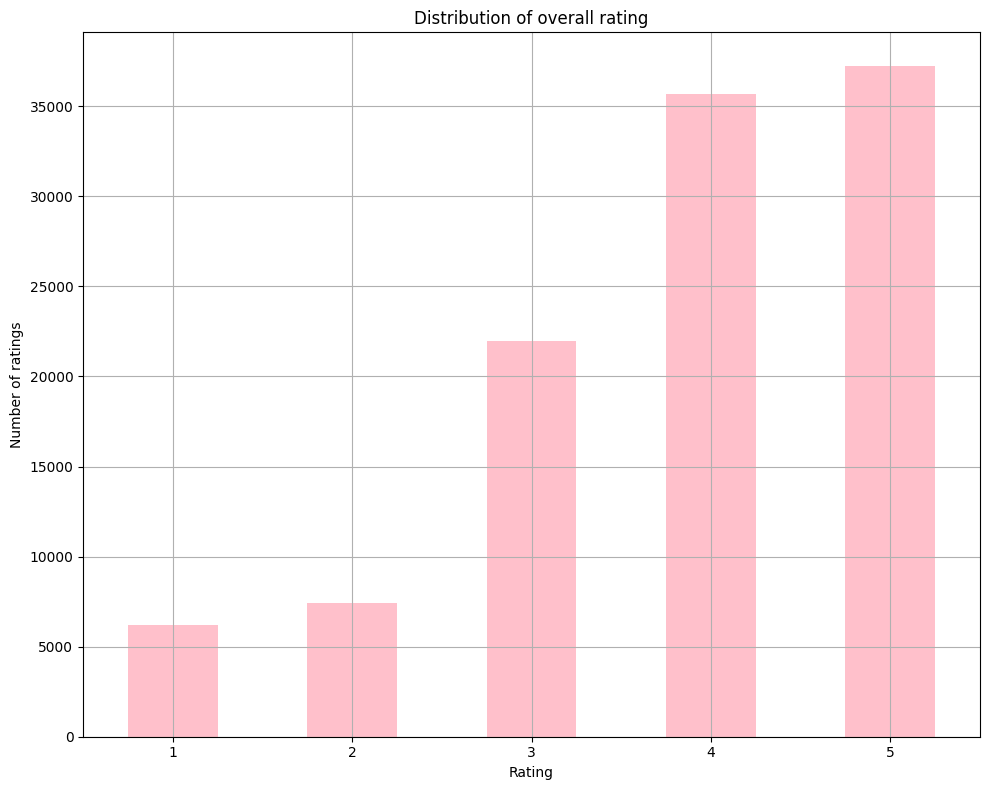

In [16]:
df['overall_rating'].value_counts(ascending=True).plot(kind='bar',figsize=(10,8),color = 'pink')
plt.title('Distribution of overall rating')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.xticks(rotation = 0) 
plt.tight_layout()
plt.grid(True)
plt.show()

## Distribution of work-life balance

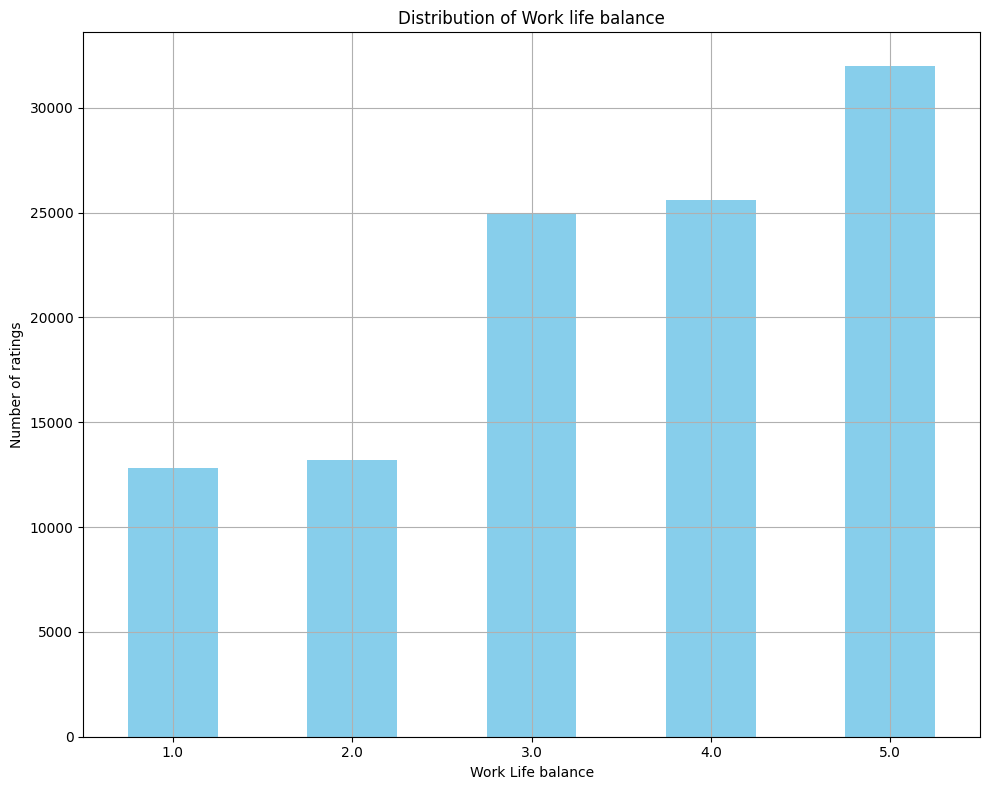

In [15]:
df['work_life_balance'].value_counts(ascending=True).plot(kind='bar',figsize=(10,8),color = 'skyblue')
plt.title('Distribution of Work life balance')
plt.xlabel('Work Life balance')
plt.ylabel('Number of ratings')
plt.xticks(rotation = 0) 
plt.tight_layout()
plt.grid(True)
plt.show()

## Distribution of culture values

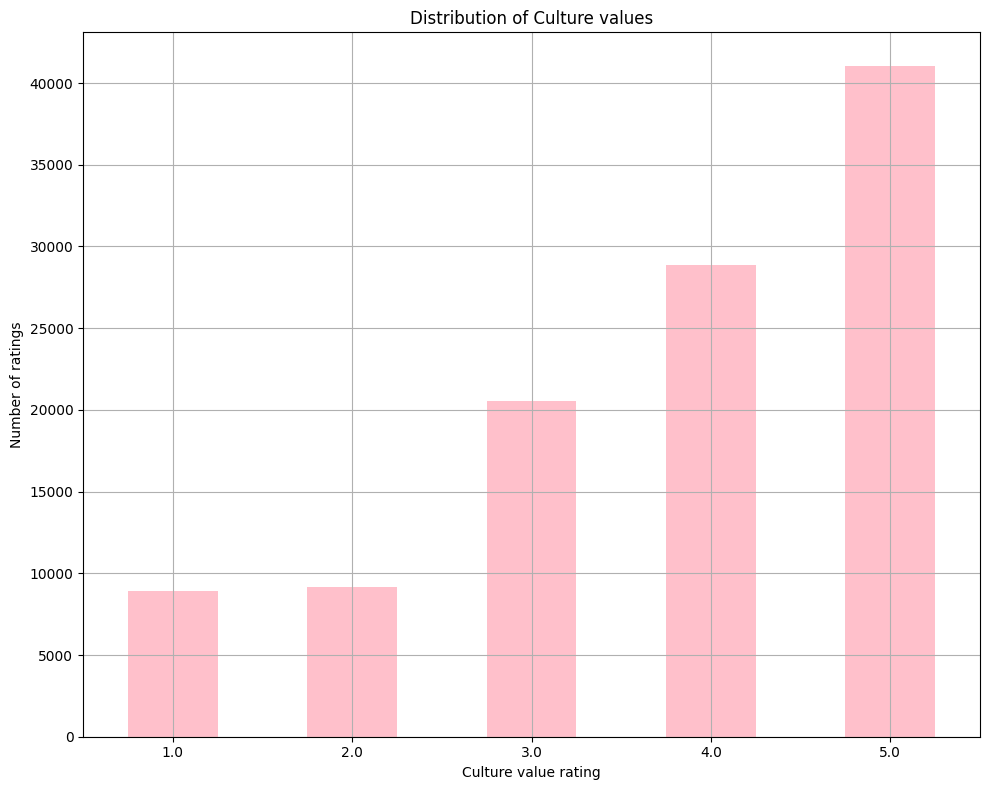

In [14]:
df['culture_values'].value_counts(ascending=True).plot(kind='bar',figsize=(10,8),color = 'pink')
plt.title('Distribution of Culture values')
plt.xlabel('Culture value rating')
plt.ylabel('Number of ratings')
plt.xticks(rotation = 0) 
plt.tight_layout()
plt.grid(True)
plt.show()

### Diversity inclusion Distribution

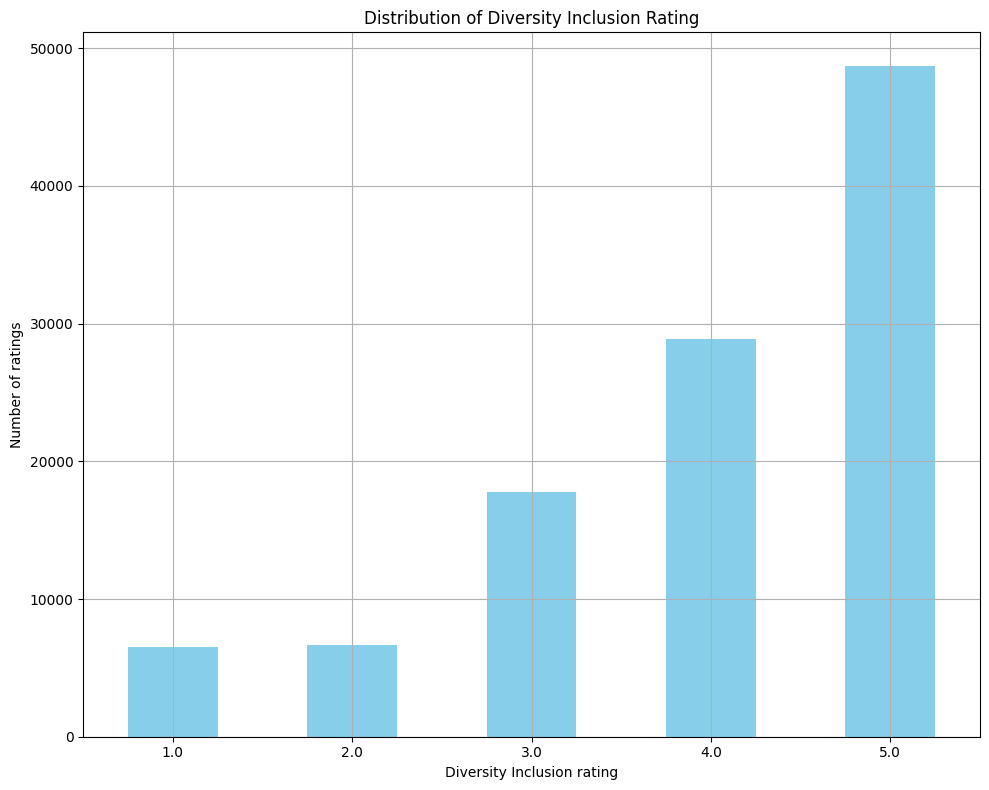

In [17]:
df['diversity_inclusion'].value_counts(ascending=True).plot(kind='bar',figsize=(10,8),color = 'skyblue')
plt.title('Distribution of Diversity Inclusion Rating')
plt.xlabel('Diversity Inclusion rating')
plt.ylabel('Number of ratings')
plt.xticks(rotation = 0) 
plt.tight_layout()
plt.grid(True)
plt.show()

### Compensation benefits Distribution

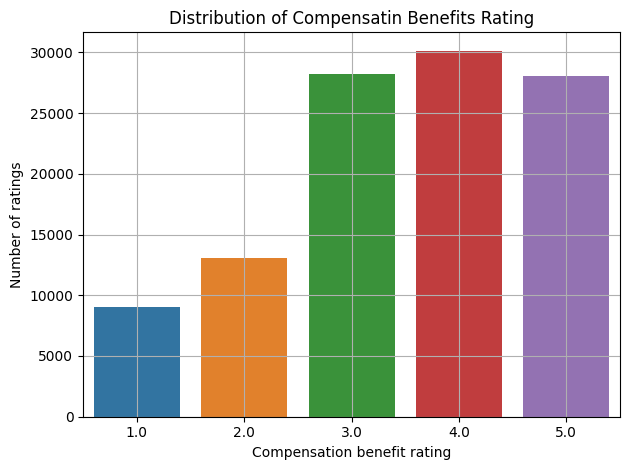

In [33]:
# df.groupby('comp_benefits')['firm'].count().plot(kind='bar',figsize=(10,8),color = 'pink')
sns.barplot(x = df['comp_benefits'].value_counts().index, y =df['comp_benefits'].value_counts().values)
# df['comp_benefits'].value_counts().plot(kind='bar',figsize=(10,8),color = 'pink')
plt.title('Distribution of Compensatin Benefits Rating')
plt.xlabel('Compensation benefit rating')
plt.ylabel('Number of ratings')
plt.xticks(rotation = 0) 
plt.tight_layout()
plt.grid(True)
plt.show()

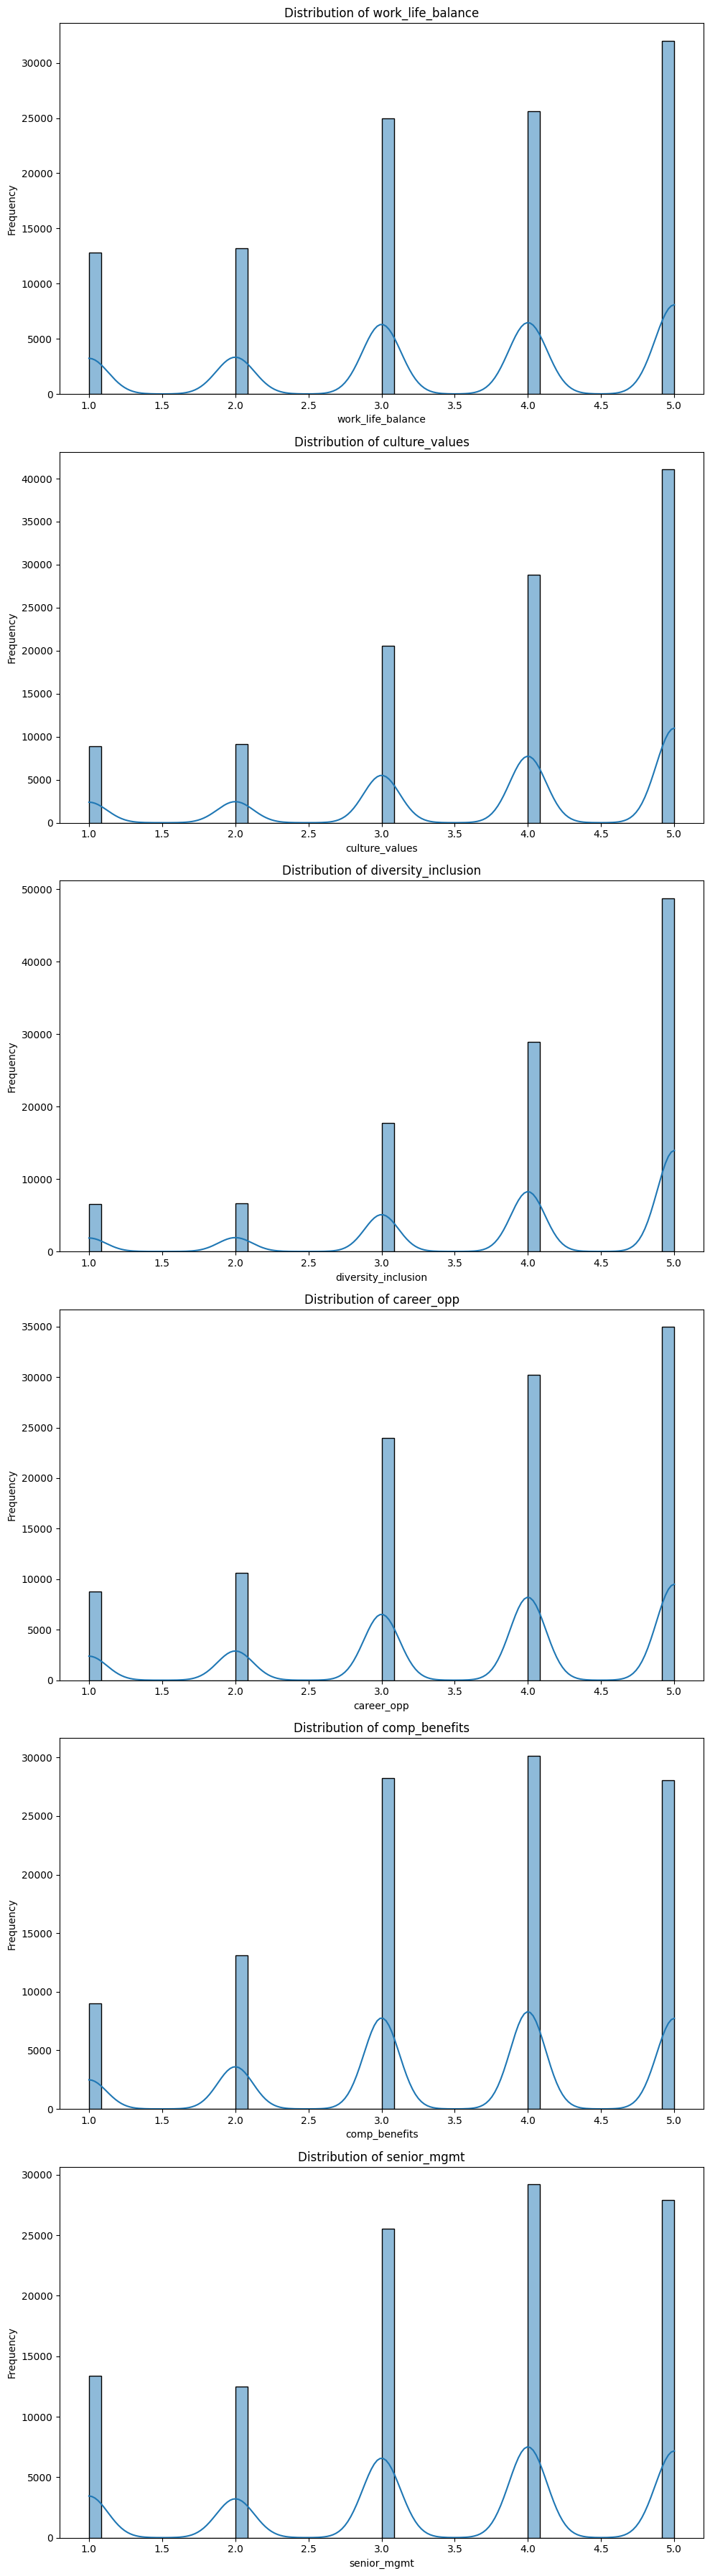

In [21]:
rating_columns = ['work_life_balance', 'culture_values', 'diversity_inclusion', 
                   'career_opp', 'comp_benefits', 'senior_mgmt']

fig, axes = plt.subplots(nrows=len(rating_columns), ncols=1, figsize=(10, len(rating_columns) * 6))

for i, column in enumerate(rating_columns):
    ax = axes[i]
    
    sns.histplot(df[column], kde=True, ax=ax)
    
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

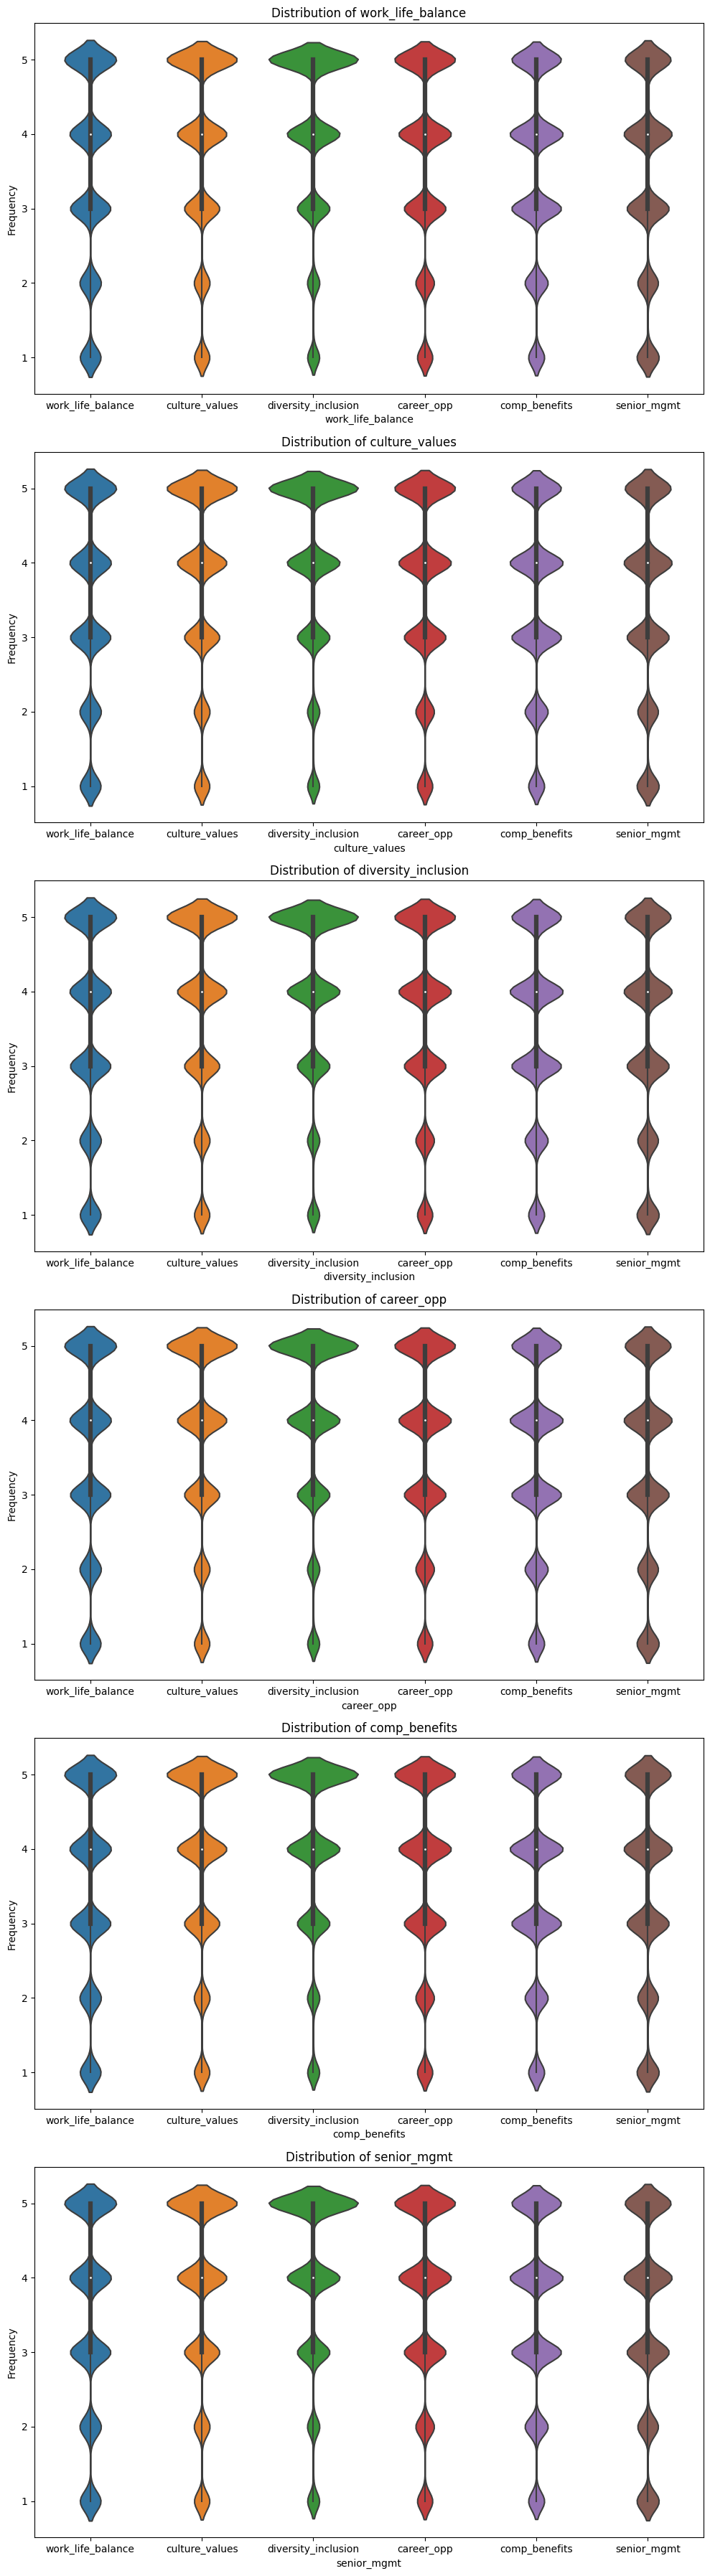

In [23]:
rating_columns = ['work_life_balance', 'culture_values', 'diversity_inclusion', 
                   'career_opp', 'comp_benefits', 'senior_mgmt']

fig, axes = plt.subplots(nrows=len(rating_columns), ncols=1, figsize=(10, len(rating_columns) * 6))

for i, column in enumerate(rating_columns):
    ax = axes[i]
    
    sns.violinplot(x='variable', y='value', data=pd.melt(df[rating_columns]), ax=ax)
    
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Location analysis

### Distribution of reviews by location

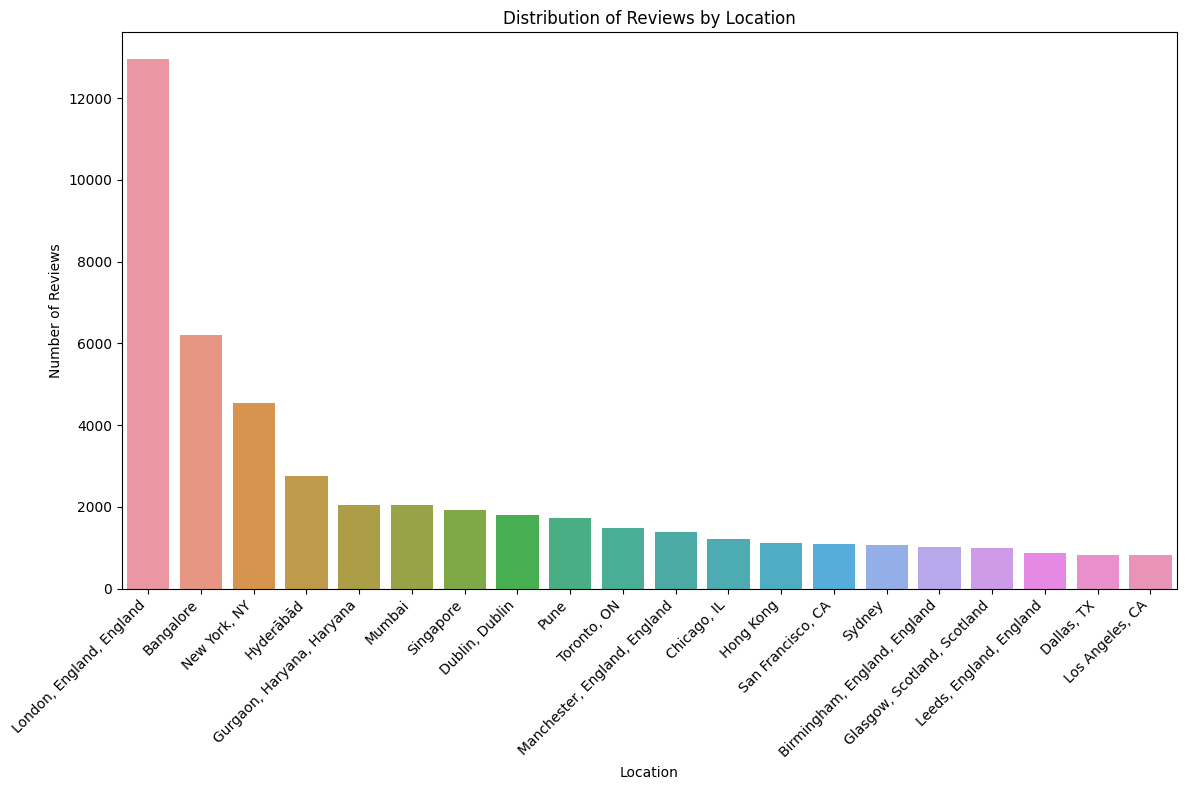

In [27]:
location_counts = df['location'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.xticks(rotation = 45, ha = 'right')  
plt.xlabel('Location')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Location')
plt.tight_layout()
plt.show()


## Text Analysis

### Most common words in pros and Cons

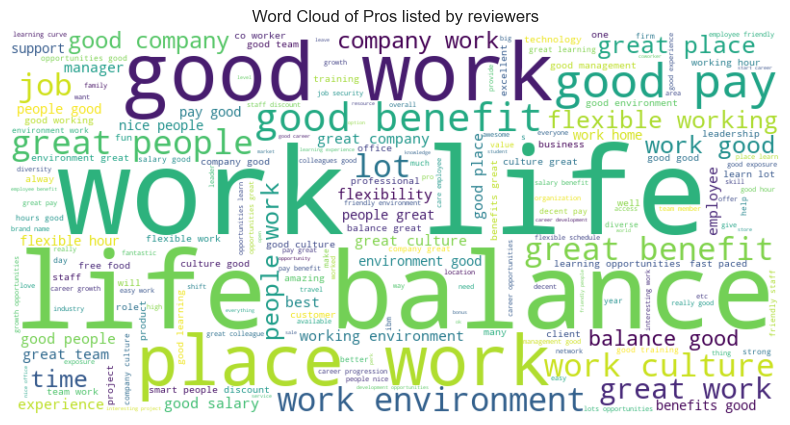

In [43]:
all_words = ' '.join(df['pros'].dropna())

stopwords = set(STOPWORDS)
processed_text = ' '.join([word.lower() for word in all_words.split() if word.lower() not in stopwords])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud of Pros listed by reviewers')
plt.show()

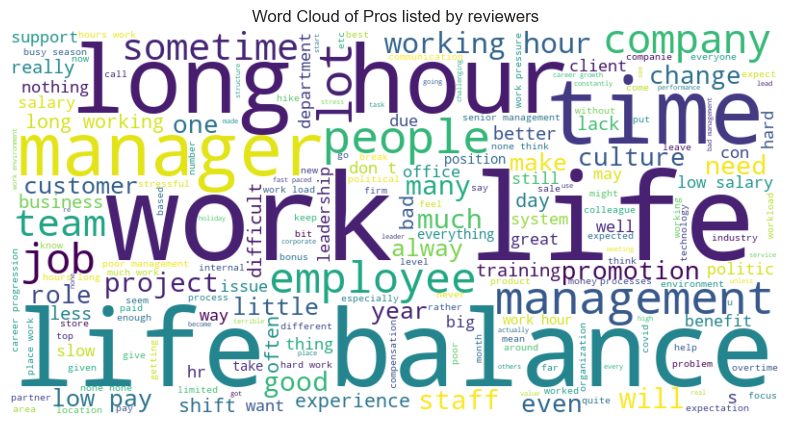

In [44]:
all_words = ' '.join(df['cons'].dropna())

stopwords = set(STOPWORDS)
processed_text = ' '.join([word.lower() for word in all_words.split() if word.lower() not in stopwords])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud of Cons listed by reviewers')
plt.show()